In [1]:
import sys
sys.path.append('../')
from read_data_functions import *
from plot_functions import *
from calculations import *
plt.style.use('../Style.mplstyle')
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None  # suppress warnings

In [ ]:
path = '../../../Data/Old data/'
AMS_paths = ['220505_ramp_carene_258K/', '220518_ramp_apinene_258K/', '220608_ramp_apinene_293K/']

AMS = {}
for AMS_path in AMS_paths:
    df = import_data(f'{path}{AMS_path}AMS/', '', 't_series', '%d-%m-%Y %H:%M:%S', 0)
    name = AMS_path.split('_')[0]
    for key in df.keys():            
        if 'PToF' not in key:
            if 'old' in key:
                df[key].columns = ['t_series', 'HROrg', 'HRNO3', 'HRSO4', 'HRNH4', 'HRChl', 
                                   'f44', 'f43', 'Ratio_H_C', 'Ratio_O_C', 'Time']
            else:
                df[key].columns = ['t_series', 'HROrg', 'HRNO3', 'HRSO4', 'HRNH4', 'HRChl', 
                                   'Ratio_H_C', 'Ratio_O_C', 'familyCHN', 'familyCHO1', 'familyCHO1N', 'familyCH', 'f43', 'f44', 'Time']
            AMS[key] = df[key]

print(AMS['220505_AMS'].keys())
print(AMS['220505_AMS_old'].keys())

dict_keys = ['220505_AMS', '220505_AMS_old', '220518_AMS', '220518_AMS_old', '220608_AMS', '220608_AMS_old']

Index(['t_series', 'HROrg', 'HRNO3', 'HRSO4', 'HRNH4', 'HRChl', 'Ratio_H_C',
       'Ratio_O_C', 'familyCHN', 'familyCHO1', 'familyCHO1N', 'familyCH',
       'f43', 'f44', 'Time'],
      dtype='object')
Index(['t_series', 'HROrg', 'HRNO3', 'HRSO4', 'HRNH4', 'HRChl', 'f44', 'f43',
       'Ratio_H_C', 'Ratio_O_C', 'Time'],
      dtype='object')


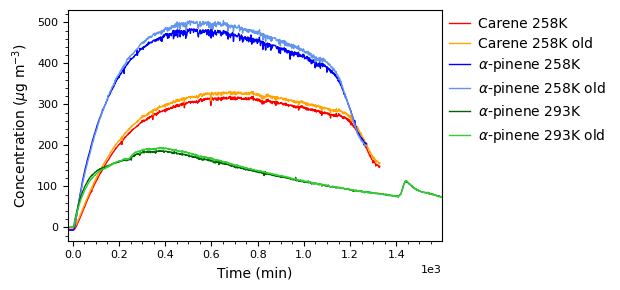

In [3]:
start_times = ['2022-05-05 14:48', '2022-05-05 14:48', 
               '2022-05-18 14:34', '2022-05-18 14:34', 
               '2022-06-08 10:20', '2022-06-08 10:20']

colors = ['r', 'orange', 'b', 'cornflowerblue', 'darkgreen', 'limegreen']
fig1, ax1 = plt.subplots(figsize = (6.3, 3))

for i, t_zero in enumerate(start_times):
    plot_total(ax1, AMS[dict_keys[i]], 'HROrg', colors[i], False, t_zero)

ax1.set(ylabel = 'Concentration ($\mu$g m$^{-3}$)')
ax1.legend(labels = ['Carene 258K', 'Carene 258K old', r'$\alpha$-pinene 258K', 
                     r'$\alpha$-pinene 258K old', r'$\alpha$-pinene 293K', r'$\alpha$-pinene 293K old']
           , bbox_to_anchor = (1, 1))
fig1.tight_layout()
fig1.savefig('Timeseries.jpg', dpi = 600)

f(x) = 1.0247631873721232x + 4.792982070111385, R2 = 0.9999959562290148
f(x) = 1.0798928231620577x + -19.27403805708626, R2 = 0.9985476501324947
f(x) = 1.0671528659096219x + -6.724467114796059, R2 = 0.995930123606595


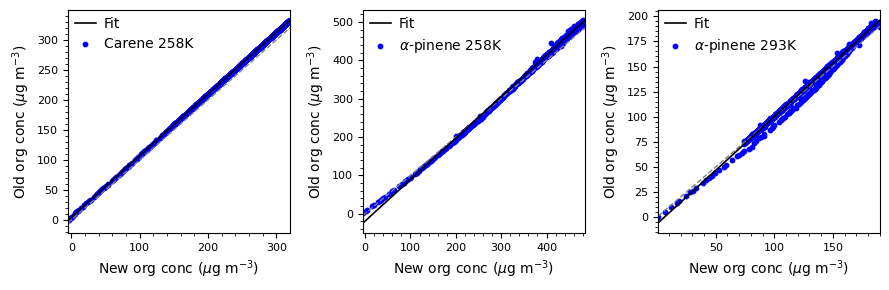

In [4]:
timestamps = [['2022-05-05 14:52', '2022-05-06 12:56'],
              ['2022-05-18 14:39', '2022-05-19 11:44'],
              ['2022-06-08 10:23', '2022-06-09 12:57']]
labels = ['Carene 258K', r'$\alpha$-pinene 258K', r'$\alpha$-pinene 293K']

fig2, ax2 = plt.subplots(1, 3, figsize = (9, 3))

for i, key in enumerate(dict_keys[::2]):
    new_AMS = time_filtered_conc(AMS[key], ['HROrg'], timestamps[i])
    old_AMS = time_filtered_conc(AMS[f'{key}_old'], ['HROrg'], timestamps[i])

    instrument_comparison(ax2[i], new_AMS['HROrg'], old_AMS['HROrg'], labels[i], 
                          ['New org conc ($\mu$g m$^{-3}$)', 'Old org conc ($\mu$g m$^{-3}$)'], False)

fig2.tight_layout()
fig2.savefig('HROrg_comparison.jpg', dpi = 600)